<a href="https://colab.research.google.com/github/blindblackcat/assets/blob/main/Homework001zoomcamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Module 1 Homework (2025 cohort)- Maria Fernanda Villa**


In this homework, we're going to download finance data from various sources and make simple calculations or analysis.

Question 1: [Index] S&P 500 Stocks Added to the Index
Which year had the highest number of additions?

Using the list of S&P 500 companies from Wikipedia's S&P 500 companies page, download the data including the year each company was added to the index.

Hint: you can use pandas.read_html to scrape the data into a DataFrame.

Steps:

Create a DataFrame with company tickers, names, and the year they were added.
Extract the year from the addition date and calculate the number of stocks added each year.
Which year had the highest number of additions (1957 doesn't count, as it was the year when the S&P 500 index was founded)? Write down this year as your answer (the most recent one, if you have several records).
Context:

"Following the announcement, all four new entrants saw their stock prices rise in extended trading on Friday" - recent examples of S&P 500 additions include DASH, WSM, EXE, TKO in 2025 (Nasdaq article).

Additional: How many current S&P 500 stocks have been in the index for more than 20 years? When stocks are added to the S&P 500, they usually experience a price bump as investors and index funds buy shares following the announcement.

In [ ]:
!pip install yfinance

In [2]:
# IMPORTS
import numpy as np
import pandas as pd

#Fin Data Sources
import yfinance as yf
import pandas_datareader as pdr

#Data viz
import plotly.graph_objs as go
import plotly.express as px

import time
from datetime import datetime
from datetime import date

In [ ]:
SP500ListLink="https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
SP500=pd.read_html(SP500ListLink)


In [ ]:
SP500Stocks = SP500[0]
SP500Changes = SP500[1]

In [ ]:
SP500Stocks

In [ ]:
SP500Changes

In [ ]:
SP500Stocks["Date added"]=pd.to_datetime(SP500Stocks["Date added"])

In [ ]:
pt=pd.pivot_table(SP500Stocks,values="Security",index="Date added",aggfunc="count")

In [ ]:
yearly=pt.resample("YE").sum().sort_values(by="Security",ascending=False)

In [ ]:
from matplotlib import pyplot as plt
yearly.plot(kind='bar', figsize=(20, 10), title='Yearly Changes')
plt.show()

In [ ]:
from matplotlib import pyplot as plt
pt.plot(kind='line', figsize=(20, 10), title='Yearly Changes')
plt.show()

In [ ]:
Top3 = yearly.nlargest(3,"Security")
Top3


In [ ]:
SP500Changes[('Date', 'Date')] = pd.to_datetime(SP500Changes[('Date', 'Date')])
mask = SP500Changes[('Date', 'Date')].dt.year.isin([2016, 2017])
filtered_df = SP500Changes.loc[mask]


In [ ]:
filtered_df



In [ ]:
!pip install bertopic sentence-transformers




In [ ]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
import umap.umap_ as umap
import pandas as pd
import plotly.io as pio


pio.renderers.default = "browser"


texts = SP500Changes[('Reason', 'Reason')].dropna().astype(str).tolist()

umap_model = umap.UMAP(
    n_neighbors=3,
    n_components=2,
    min_dist=0.1,
    metric='cosine',
    random_state=42
)


embedding_model = SentenceTransformer("all-MiniLM-L6-v2")


topic_model = BERTopic(
    embedding_model=embedding_model,
    umap_model=umap_model,
    language="english",
    verbose=True
)


topics, probs = topic_model.fit_transform(texts)


topic_info = topic_model.get_topic_info()
print(topic_info.head())


fig = topic_model.visualize_topics()
fig = topic_model.visualize_topics()
fig.write_html("topics_visualization.html")
from google.colab import files
files.download("topics_visualization.html")


**Answer to question 1:**

The Year with the most additions was 2017

D1:
* Low interest rates made it easy and cheap for companies and private equity firms to finance mergers and acquisitions.

* Private equity activity surged, leading to many public companies
being acquired and taken private, requiring replacements in the index.

* Tech and pharma companies had large cash reserves and used them to:



1. Acquire smaller companies
2. Spin off divisions
3. Restructure operations

*  Spin off divisions,Restructure operations,Anticipation of U.S. tax reform under the Trump administration led to a rush of corporate actions before policy changes took effect.

D2

* Market capitalization shifts triggered index adjustments, as companies grew or shrank relative to others.

* Structural changes to the S&P, like the creation of the Real Estate sector in 2016.

* These years were marked by unusually high corporate activity, especially in tech, pharma, and private equity  all contributing to the pike.

In [ ]:
SP500ComponentStocks.columns

In [ ]:
SP500ComponentStocks["TimeInIndex"]=pd.Timestamp.today()-SP500ComponentStocks["Date added"]
SP500ComponentStocks["TimeInIndex"]=SP500ComponentStocks["TimeInIndex"].dt.days/365 #Not 252 days since is datetime year, not financial.

In [ ]:
Y20securities=SP500ComponentStocks[SP500ComponentStocks["TimeInIndex"]>20].sort_values(by="TimeInIndex",ascending=0).reset_index(drop=1)

In [ ]:
Y20securities

#Clean The data:

1. understand why Date added before foundation date in some securities.

In [ ]:
SP500ComponentStocks["Founded_clean"] = SP500ComponentStocks["Founded"].astype(str).str.extract(r'(\d{4})')

SP500ComponentStocks["error"] = SP500ComponentStocks.apply(
    lambda row: (
        f"Error: added in {pd.to_datetime(row['Date added'], errors='coerce').year} "
        f"but founded in {int(row['Founded_clean'])}"
    )
    if pd.notna(row["Date added"])
       and pd.notna(row["Founded_clean"])
       and pd.to_datetime(row["Date added"], errors='coerce').year < int(row["Founded_clean"])
    else None,
    axis=1
)


In [ ]:
SP500ComponentStocks

In [ ]:
SP500ComponentStocks[SP500ComponentStocks["error"].notna()][["Security", "error"]].reset_index(drop=1)


In [ ]:
error_list = pd.DataFrame({
    "Security": [
        "AbbVie", "Altria", "Bank of America", "Bristol Myers Squibb", "Cigna", "Citigroup", "ConocoPhillips",
        "Coterra", "CSX Corporation", "CVS Health", "DTE Energy", "Elevance Health", "Exelon", "ExxonMobil",
        "JPMorgan Chase", "L3Harris", "Lockheed Martin", "Molson Coors Beverage Company", "NextEra Energy",
        "Northrop Grumman", "Paramount Global", "Simon Property Group", "Tapestry, Inc.", "Thermo Fisher Scientific",
        "TJX Companies", "Walgreens Boots Alliance"
    ],
    "error": [
        "Error: added in 2012 but founded in 2013", "Error: added in 1957 but founded in 1985",
        "Error: added in 1976 but founded in 1998", "Error: added in 1957 but founded in 1989",
        "Error: added in 1976 but founded in 1982", "Error: added in 1988 but founded in 1998",
        "Error: added in 1957 but founded in 2002", "Error: added in 2008 but founded in 2021",
        "Error: added in 1957 but founded in 1980", "Error: added in 1957 but founded in 1996",
        "Error: added in 1957 but founded in 1995", "Error: added in 2002 but founded in 2014",
        "Error: added in 1957 but founded in 2000", "Error: added in 1957 but founded in 1999",
        "Error: added in 1975 but founded in 2000", "Error: added in 2008 but founded in 2019",
        "Error: added in 1957 but founded in 1995", "Error: added in 1976 but founded in 2005",
        "Error: added in 1976 but founded in 1984", "Error: added in 1957 but founded in 1994",
        "Error: added in 1994 but founded in 2019", "Error: added in 2002 but founded in 2003",
        "Error: added in 2004 but founded in 2017", "Error: added in 2004 but founded in 2006",
        "Error: added in 1985 but founded in 1987", "Error: added in 1979 but founded in 2014"
    ]
})

# The corrected founded and S&P 500 added dates for these companies
corrections = pd.DataFrame({
    "Security": [
        "AbbVie", "Altria", "Bank of America", "Bristol Myers Squibb", "Cigna", "Citigroup", "ConocoPhillips",
        "Coterra", "CSX Corporation", "CVS Health", "DTE Energy", "Elevance Health", "Exelon", "ExxonMobil",
        "JPMorgan Chase", "L3Harris", "Lockheed Martin", "Molson Coors Beverage Company", "NextEra Energy",
        "Northrop Grumman", "Paramount Global", "Simon Property Group", "Tapestry, Inc.", "Thermo Fisher Scientific",
        "TJX Companies", "Walgreens Boots Alliance"
    ],
    "Correct Founded": [
        2012, 1985, 1998, 1989, 1982, 1998, 2002, 2021, 1980, 1963, 1995, 2014, 2000, 1999,
        2000, 2019, 1995, 2005, 1984, 1994, 2019, 2003, 2017, 2006, 1987, 2014
    ],
    "S&P 500 Added": [
        2012, 1957, 1976, 1957, 1976, 1988, 1957, 2008, 1957, 1997, 1957, 2002, 1957, 1957,
        1975, 2008, 1957, 1976, 1976, 1957, 1994, 2002, 2004, 2004, 1985, 1979
    ]
})





In [ ]:
# correction dics
founded_dict = dict(zip(corrections['Security'], corrections['Correct Founded']))
added_dict = dict(zip(corrections['Security'], corrections['S&P 500 Added']))


SP500ComponentStocks['Founded'] = SP500ComponentStocks.apply(
    lambda row: founded_dict[row['Security']] if row['Security'] in founded_dict else row['Founded'],
    axis=1
)


SP500ComponentStocks['Date added'] = SP500ComponentStocks.apply(
    lambda row: added_dict[row['Security']] if row['Security'] in added_dict else row['Date added'],
    axis=1
)

SP500ComponentStocks['Year Added'] = pd.to_datetime(SP500ComponentStocks['Date added'], errors='coerce').dt.year



In [ ]:
current_year = datetime.now().year
SP500ComponentStocks["YearsInIndex"] = current_year - SP500ComponentStocks["Year Added"]

over_20_years_count = SP500ComponentStocks[SP500ComponentStocks["YearsInIndex"] >= 20]["Security"].nunique()

print("Número de compañías con más de 20 años en el S&P 500:", over_20_years_count)


Answer: 229 companies have been in the index whether under their first foundation name or other.

Question 2. [Macro] Indexes YTD (as of 1 May 2025)
How many indexes (out of 10) have better year-to-date returns than the US (S&P 500) as of May 1, 2025?

Using Yahoo Finance World Indices data, compare the year-to-date (YTD) performance (1 January-1 May 2025) of major stock market indexes for the following countries:

United States - S&P 500 (^GSPC)
China - Shanghai Composite (000001.SS)
Hong Kong - HANG SENG INDEX (^HSI)
Australia - S&P/ASX 200 (^AXJO)
India - Nifty 50 (^NSEI)
Canada - S&P/TSX Composite (^GSPTSE)
Germany - DAX (^GDAXI)
United Kingdom - FTSE 100 (^FTSE)
Japan - Nikkei 225 (^N225)
Mexico - IPC Mexico (^MXX)
Brazil - Ibovespa (^BVSP)
Hint: use start_date='2025-01-01' and end_date='2025-05-01' when downloading daily data in yfinance

Context:

Global Valuations: Who's Cheap, Who's Not? article suggests "Other regions may be growing faster than the US and you need to diversify."

Reference: Yahoo Finance World Indices - https://finance.yahoo.com/world-indices/

Additional: How many of these indexes have better returns than the S&P 500 over 3, 5, and 10 year periods? Do you see the same trend? Note: For simplicity, ignore currency conversion effects.)

In [ ]:

tickers = {
    'USA': '^GSPC',
    'China': '000001.SS',
    'Hong Kong': '^HSI',
    'Australia': '^AXJO',
    'India': '^NSEI',
    'Canada': '^GSPTSE',
    'Germany': '^GDAXI',
    'UK': '^FTSE',
    'Japan': '^N225',
    'Mexico': '^MXX',
    'Brazil': '^BVSP'
}


end_date = '2025-05-01'
periods = {
    'YTD': ('2025-01-01', end_date),
    '3Y': ('2022-05-01', end_date),
    '5Y': ('2020-05-01', end_date),
    '10Y': ('2015-05-01', end_date)
}


returns_df = pd.DataFrame()


earliest_start = '2015-05-01'
try:
    data = yf.download(list(tickers.values()), start=earliest_start, end=end_date, progress=False)['Close']
except Exception as e:
    print(f"Error downloading data: {e}")
    data = pd.DataFrame()

Nine of the twelve indexes have had better YTD returns than S&P 500

In [ ]:
for label, (start, end) in periods.items():
    returns = {}
    start_dt = pd.to_datetime(start)
    end_dt = pd.to_datetime(end)

    for ticker in tickers.values():
        if ticker in data.columns:
            series = data[ticker].dropna()
            series = series[(series.index >= start_dt) & (series.index <= end_dt)]

            if len(series) >= 2:
                first_price = series.iloc[0]
                last_price = series.iloc[-1]
                returns[ticker] = (last_price / first_price - 1) * 100

                if label in ['3Y', '5Y', '10Y']:
                    years = (end_dt - start_dt).days / 252
                    if years > 0:
                        returns[ticker] = ((last_price / first_price) ** (1 / years) - 1) * 100
            else:
                print(f"Warning: Insufficient data for {ticker} in period {label}")
                returns[ticker] = float('nan')
        else:
            print(f"Warning: No data for {ticker} in period {label}")
            returns[ticker] = float('nan')

    returns_df[label] = pd.Series(returns)


returns_df.index = list(tickers.keys())


print("Returns (%):\n", returns_df.round(2))
print("\nNumber of indexes beating USA (S&P 500) per period:")
better_than_usa = (returns_df.gt(returns_df.loc['USA'], axis=1)).sum()
print(better_than_usa)


nan_counts = returns_df.isna().sum()
if nan_counts.sum() > 0:
    print("\nIndices with missing data per period:")
    print(nan_counts)

Returns (%):
              YTD     3Y     5Y   10Y
USA        -5.10   6.96   9.79  6.93
China       0.50   1.54   1.82 -2.13
Hong Kong  12.72   1.09  -0.90 -1.64
Australia  -0.91   2.34   6.23  2.34
India       2.49   8.50  14.21  7.67
Canada     -0.23   4.29   7.59  3.38
Germany    12.35  11.63  11.14  4.66
UK          2.84   2.71   5.50  1.36
Japan      -8.30   7.04   8.76  4.32
Mexico     13.05   1.88   6.20  1.52
Brazil     12.44   5.58   7.71  6.09

Number of indexes beating USA (S&P 500) per period:
YTD    9
3Y     3
5Y     2
10Y    1
dtype: int64


Over the last 10 years, the U.S. has clearly led global markets — especially with the dominance of tech. But things have started to shift. Around 5 years ago, that lead began to fade, and today we’re seeing something much more pronounced: capital is moving toward emerging markets.

This isn’t just investors reacting to the fear of a U.S. recession or political mess, though that’s definitely part of it. There’s also a sense that some emerging countries are genuinely getting their act together. India, Brazil, parts of Southeast Asia, they’re pushing through real reforms, investing in infrastructure, and attracting serious attention.

At the same time, the dollar cycle plays a role. When the Fed backs off rate hikes, and the dollar softens, emerging markets often look more attractive. Local currencies get stronger, and returns improve — especially for foreign investors.

So overall, it feels like the global dynamic is shifting. The U.S. might still be the long-term anchor, but for now, there’s a clear rotation happening  and emerging markets are finally starting to catch a meaningful bid.

Question 3. [Index] S&P 500 Market Corrections Analysis
Calculate the median duration (in days) of significant market corrections in the S&P 500 index.

For this task, define a correction as an event when a stock index goes down by more than 5% from the closest all-time high maximum.

Steps:

Download S&P 500 historical data (1950-present) using yfinance
Identify all-time high points (where price exceeds all previous prices)
For each pair of consecutive all-time highs, find the minimum price in between
Calculate drawdown percentages: (high - low) / high × 100
Filter for corrections with at least 5% drawdown
Calculate the duration in days for each correction period
Determine the 25th, 50th (median), and 75th percentiles for correction durations
Context:

Investors often wonder about the typical length of market corrections when deciding "when to buy the dip" (Reddit discussion).
A Wealth of Common Sense - How Often Should You Expect a Stock Market Correction?
Hint (use this data to compare with your results): Here is the list of top 10 largest corrections by drawdown:

2007-10-09 to 2009-03-09: 56.8% drawdown over 517 days
2000-03-24 to 2002-10-09: 49.1% drawdown over 929 days
1973-01-11 to 1974-10-03: 48.2% drawdown over 630 days
1968-11-29 to 1970-05-26: 36.1% drawdown over 543 days
2020-02-19 to 2020-03-23: 33.9% drawdown over 33 days
1987-08-25 to 1987-12-04: 33.5% drawdown over 101 days
1961-12-12 to 1962-06-26: 28.0% drawdown over 196 days
1980-11-28 to 1982-08-12: 27.1% drawdown over 622 days
2022-01-03 to 2022-10-12: 25.4% drawdown over 282 days
1966-02-09 to 1966-10-07: 22.2% drawdown over 240 days

In [ ]:
sp500_df = yf.download('^GSPC', start='1950-01-01', progress=False)

In [ ]:
sp500_df.columns

MultiIndex([( 'Close', '^GSPC'),
            (  'High', '^GSPC'),
            (   'Low', '^GSPC'),
            (  'Open', '^GSPC'),
            ('Volume', '^GSPC')],
           names=['Price', 'Ticker'])

In [ ]:
#make a series
sp500 = sp500_df[( 'Close', '^GSPC')]
sp500_ath = sp500.cummax()


new_ath_mask = sp500 == sp500_ath
groups = new_ath_mask.cumsum()
sp500

,Close
,^GSPC
Date,
1950-01-03,16.660000
1950-01-04,16.850000
1950-01-05,16.930000
1950-01-06,16.980000
1950-01-09,17.080000
...,...
2025-05-27,5921.540039
2025-05-28,5888.549805


<Axes: title={'center': "EPI's etf stock price"}, xlabel='Date'>

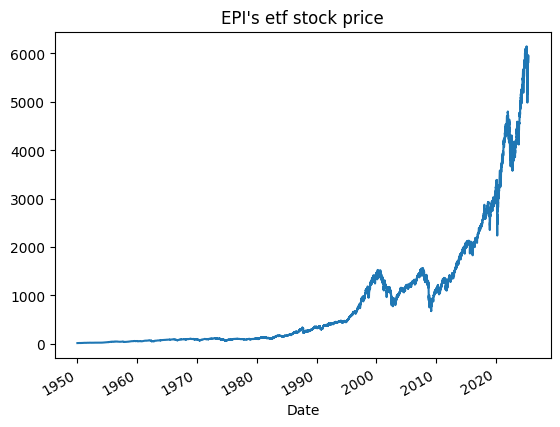

In [ ]:
sp500.plot(title="EPI's etf stock price")

In [ ]:
corrections = []

for grp_id, grp_data in sp500.groupby(groups):
    if len(grp_data) < 2:
        continue

    start_date = grp_data.index[0]
    end_date = grp_data.index[-1]
    start_price = grp_data.iloc[0]
    trough_price = grp_data.min()
    trough_date = grp_data.idxmin()

    drawdown_pct = (start_price - trough_price) / start_price * 100
    duration_days = (trough_date - start_date).days

    if drawdown_pct >= 5:
        corrections.append({
            'Start': start_date,
            'Trough': trough_date,
            'End': end_date,
            'Drawdown %': round(drawdown_pct, 2),
            'Duration (days)': duration_days
        })

corrections_df = pd.DataFrame(corrections)


In [ ]:
corrections_df

,Start,Trough,End,Drawdown %,Duration (days)
0,1950-06-12,1950-07-17,1950-09-21,14.02,35
1,1950-11-24,1950-12-04,1950-12-27,6.50,10
2,1951-05-03,1951-06-29,1951-08-01,8.11,57
3,1951-10-15,1951-11-23,1952-01-02,6.08,39
4,1952-01-22,1952-02-20,1952-06-24,6.37,29
...,...,...,...,...,...
67,2021-09-02,2021-10-04,2021-10-20,5.21,32
68,2022-01-03,2022-10-12,2024-01-18,25.43,282
69,2024-03-28,2024-04-19,2024-05-14,5.46,22
70,2024-07-16,2024-08-05,2024-09-18,8.49,20


In [ ]:
corrections_df.sort_values(by="Drawdown %",ascending=0).head(10)

,Start,Trough,End,Drawdown %,Duration (days)
56,2007-10-09,2009-03-09,2013-03-27,56.78,517
54,2000-03-24,2002-10-09,2007-05-29,49.15,929
24,1973-01-11,1974-10-03,1980-07-16,48.20,630
22,1968-11-29,1970-05-26,1972-03-03,36.06,543
65,2020-02-19,2020-03-23,2020-08-17,33.92,33
35,1987-08-25,1987-12-04,1989-07-25,33.51,101
15,1961-12-12,1962-06-26,1963-08-30,27.97,196
27,1980-11-28,1982-08-12,1982-11-02,27.11,622
68,2022-01-03,2022-10-12,2024-01-18,25.43,282
18,1966-02-09,1966-10-07,1967-05-03,22.18,240


In [ ]:
duration_average = corrections_df['Duration (days)'].mean()
duration_max=corrections_df['Duration (days)'].max()
duration_min=corrections_df['Duration (days)'].min()
duration_average

np.float64(112.19444444444444)

Average duration of correections is 113

Question 4. [Stocks] Earnings Surprise Analysis for Amazon (AMZN)
Calculate the median 2-day percentage change in stock prices following positive earnings surprises days.

Steps:

Load earnings data from CSV (ha1_Amazon.csv) containing earnings dates, EPS estimates, and actual EPS. Make sure you are using the correct delimiter to read the data, such as in this command python pandas.read_csv("ha1_Amazon.csv", delimiter=';')
Download complete historical price data using yfinance
Calculate 2-day percentage changes for all historical dates: for each sequence of 3 consecutive trading days (Day 1, Day 2, Day 3), compute the return as Close_Day3 / Close_Day1 - 1. (Assume Day 2 may correspond to the earnings announcement.)
Identify positive earnings surprises (where "actual EPS > estimated EPS"). Both fields should be present in the file. You should obtain 36 data points for use in the descriptive analysis (median) later.
Calculate 2-day percentage changes following positive earnings surprises. Show your answer in % (closest number to the 2nd digit): return * 100.0
(Optional) Compare the median 2-day percentage change for positive surprises vs. all historical dates. Do you see the difference?
Context: Earnings announcements, especially when they exceed analyst expectations, can significantly impact stock prices in the short term.

Reference: Yahoo Finance earnings calendar - https://finance.yahoo.com/calendar/earnings?symbol=AMZN

Additional: Is there a correlation between the magnitude of the earnings surprise and the stock price reaction? Does the market react differently to earnings surprises during bull vs. bear markets?)

In [149]:
amazon_df = pd.read_csv("https://raw.githubusercontent.com/blindblackcat/assets/refs/heads/main/ha1_Amazon.csv", on_bad_lines='skip',delimiter=';')

In [ ]:
trailing_eps = ticker_obj.earnings_dates
trailing_eps #data to clean the CSV

In [150]:
surprise=amazon_df["EPS Estimate"] < amazon_df["Reported EPS"]
amazon_df=amazon_df[surprise]


In [151]:
columns_to_convert = ['EPS Estimate', 'Reported EPS', 'Surprise (%)']
amazon_df[columns_to_convert] =amazon_df[columns_to_convert].replace('-', np.nan)
amazon_df[columns_to_convert] =amazon_df[columns_to_convert].apply(pd.to_numeric, errors='coerce')
amazon_df=amazon_df.dropna(subset=columns_to_convert)

In [152]:
from dateutil import parser
from dateutil.tz import gettz

# Suponiendo que 'df' es tu DataFrame y 'fecha_columna' es el nombre de la columna

amazon_df['Earnings Date'] = amazon_df['Earnings Date'].astype(str).apply(
    lambda x: parser.parse(x, tzinfos={"EDT": gettz("America/New_York"), "EST": gettz("America/New_York")})
)


In [156]:
amazon_df=amazon_df.set_index(amazon_df["Earnings Date"].dt.date)

In [157]:
amazon_df

,Symbol,Company,Earnings Date,EPS Estimate,Reported EPS,Surprise (%)
Earnings Date,,,,,,
2025-05-01,AMZN,"Amazon.com, Inc.",2025-05-01 16:00:00-04:00,1.36,1.59,16.74
2025-02-06,AMZN,"Amazon.com, Inc.",2025-02-06 16:00:00-05:00,1.49,1.86,24.47
2024-10-31,AMZN,"Amazon.com, Inc.",2024-10-31 16:00:00-04:00,1.14,1.43,25.17
2024-08-01,AMZN,"Amazon.com, Inc.",2024-08-01 16:00:00-04:00,1.03,1.26,22.58
2024-04-30,AMZN,"Amazon.com, Inc.",2024-04-30 16:00:00-04:00,0.83,0.98,17.91
2024-02-01,AMZN,"Amazon.com, Inc.",2024-02-01 16:00:00-05:00,0.80,1.00,24.55
2023-10-26,AMZN,"Amazon.com, Inc.",2023-10-26 16:00:00-04:00,0.58,0.94,60.85
2023-08-03,AMZN,"Amazon.com, Inc.",2023-08-03 16:00:00-04:00,0.35,0.65,85.73
2023-04-27,AMZN,"Amazon.com, Inc.",2023-04-27 16:00:00-04:00,0.21,0.31,46.36


In [137]:
ticker_obj = yf.Ticker('AMZN')
AMZN_df_daily = ticker_obj.history(period="max")

In [164]:
AMZN_df_daily

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,adj_close_2_days,2day_growth
Date,,,,,,,,,,
1997-05-15,1997-05-15 00:00:00-04:00,0.121875,0.125000,0.096354,0.097917,1443120000,0.0,0.0,NaN,NaN
1997-05-16,1997-05-16 00:00:00-04:00,0.098438,0.098958,0.085417,0.086458,294000000,0.0,0.0,NaN,NaN
1997-05-19,1997-05-19 00:00:00-04:00,0.088021,0.088542,0.081250,0.085417,122136000,0.0,0.0,0.097917,-0.127659
1997-05-20,1997-05-20 00:00:00-04:00,0.086458,0.087500,0.081771,0.081771,109344000,0.0,0.0,0.086458,-0.054211
1997-05-21,1997-05-21 00:00:00-04:00,0.081771,0.082292,0.068750,0.071354,377064000,0.0,0.0,0.085417,-0.164639
...,...,...,...,...,...,...,...,...,...,...
2025-05-28,2025-05-28 00:00:00-04:00,205.919998,207.660004,204.410004,204.720001,28549800,0.0,0.0,200.990005,0.018558
2025-05-29,2025-05-29 00:00:00-04:00,208.029999,208.809998,204.229996,205.699997,34650000,0.0,0.0,206.020004,-0.001553
2025-05-30,2025-05-30 00:00:00-04:00,204.839996,205.990005,201.699997,205.009995,51679400,0.0,0.0,204.720001,0.001417


In [139]:
AMZN_df_daily['adj_close_2_days'] = AMZN_df_daily['Close'].shift(2)
AMZN_df_daily['2day_growth'] = AMZN_df_daily['Close'] / AMZN_df_daily['adj_close_2_days'] -1

In [161]:
AMZN_df_daily=AMZN_df_daily.reset_index()


In [163]:
AMZN_df_daily=AMZN_df_daily.set_index(AMZN_df_daily.Date.dt.date)

In [187]:
AMZON=pd.merge(AMZN_df_daily,amazon_df,left_on=AMZN_df_daily.index-pd.Timedelta(days=1),right_index=True,how="right")

In [188]:
AMZON

,key_0,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,adj_close_2_days,2day_growth,Symbol,Company,Earnings Date,EPS Estimate,Reported EPS,Surprise (%)
Date,,,,,,,,,,,,,,,,,
2025-05-02,2025-05-01,2025-05-02 00:00:00-04:00,191.440002,192.880005,186.399994,189.979996,77903500,0.0,0.0,184.419998,0.030149,AMZN,"Amazon.com, Inc.",2025-05-01 16:00:00-04:00,1.36,1.59,16.74
2025-02-07,2025-02-06,2025-02-07 00:00:00-05:00,232.500000,234.809998,228.059998,229.149994,77539300,0.0,0.0,236.169998,-0.029724,AMZN,"Amazon.com, Inc.",2025-02-06 16:00:00-05:00,1.49,1.86,24.47
2024-11-01,2024-10-31,2024-11-01 00:00:00-04:00,199.000000,200.500000,197.020004,197.929993,99687800,0.0,0.0,192.729996,0.026981,AMZN,"Amazon.com, Inc.",2024-10-31 16:00:00-04:00,1.14,1.43,25.17
2024-08-02,2024-08-01,2024-08-02 00:00:00-04:00,166.750000,168.770004,160.550003,167.899994,141448400,0.0,0.0,186.979996,-0.102043,AMZN,"Amazon.com, Inc.",2024-08-01 16:00:00-04:00,1.03,1.26,22.58
2024-05-01,2024-04-30,2024-05-01 00:00:00-04:00,181.639999,185.149994,176.559998,179.000000,94645100,0.0,0.0,180.960007,-0.010831,AMZN,"Amazon.com, Inc.",2024-04-30 16:00:00-04:00,0.83,0.98,17.91
2024-02-02,2024-02-01,2024-02-02 00:00:00-05:00,169.190002,172.500000,167.330002,171.809998,117154900,0.0,0.0,155.199997,0.107023,AMZN,"Amazon.com, Inc.",2024-02-01 16:00:00-05:00,0.80,1.00,24.55
2023-10-27,2023-10-26,2023-10-27 00:00:00-04:00,126.199997,130.020004,125.519997,127.739998,125309300,0.0,0.0,121.389999,0.052311,AMZN,"Amazon.com, Inc.",2023-10-26 16:00:00-04:00,0.58,0.94,60.85
2023-08-04,2023-08-03,2023-08-04 00:00:00-04:00,141.059998,143.630005,139.320007,139.570007,152938700,0.0,0.0,128.210007,0.088605,AMZN,"Amazon.com, Inc.",2023-08-03 16:00:00-04:00,0.35,0.65,85.73
2023-04-28,2023-04-27,2023-04-28 00:00:00-04:00,107.730003,109.480003,104.330002,105.449997,130565000,0.0,0.0,104.980003,0.004477,AMZN,"Amazon.com, Inc.",2023-04-27 16:00:00-04:00,0.21,0.31,46.36


In [189]:
AMZON["2day_growth"].mean()

np.float64(0.028376299123091624)

 2-day percentage changes following positive earnings surprises is 2.8 %